In [33]:
import pandas as pd
data=pd.read_csv("USA_Housing.csv")

In [34]:
type(data)

pandas.core.frame.DataFrame

In [35]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [36]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

In [37]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [38]:
Y = data['Price']

In [39]:
Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [41]:
N,D=X_train.shape

In [42]:
D

5

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D)),
    tf.keras.layers.Dense(1)
])

In [45]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss="mean_squared_error",metrics=["mae"])

In [46]:
r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50)

Epoch 1/50
105/105 [==============================] - 1s 4ms/step - loss: 473416040448.0000 - mae: 551943.6250 - val_loss: 23717552128.0000 - val_mae: 126614.7656
Epoch 2/50
105/105 [==============================] - 0s 3ms/step - loss: 12780560384.0000 - mae: 90737.1875 - val_loss: 10338652160.0000 - val_mae: 81899.2578
Epoch 3/50
105/105 [==============================] - 0s 3ms/step - loss: 10318163968.0000 - mae: 81826.9609 - val_loss: 10193505280.0000 - val_mae: 81329.0938
Epoch 4/50
105/105 [==============================] - 0s 3ms/step - loss: 10282747904.0000 - mae: 81639.2500 - val_loss: 10200206336.0000 - val_mae: 81289.1953
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 10298808320.0000 - mae: 81678.8438 - val_loss: 10158560256.0000 - val_mae: 81170.8516
Epoch 6/50
105/105 [==============================] - 0s 3ms/step - loss: 10286237696.0000 - mae: 81672.2500 - val_loss: 10155820032.0000 - val_mae: 81189.1562
Epoch 7/50
105/105 [=================

In [47]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,Y_train) 

LinearRegression()

In [48]:
predictions = lm.predict(X_test)  

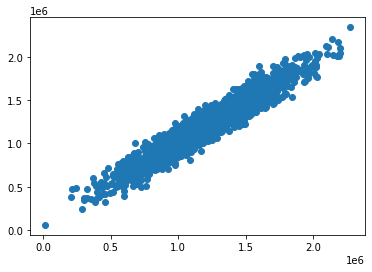

In [50]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)